In [11]:
from xml.etree.ElementTree import PI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import os
import random
import seaborn as sns
import csv
import collections
from keras.preprocessing.image import load_img
from matplotlib.pyplot import figure
from tensorflow.python.client import device_lib
#from tensorflow.keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras import backend as K

print(device_lib.list_local_devices())
warnings.filterwarnings('ignore')

mypath = "C:/Users/sager/OneDrive/Desktop/CS5824/Project/Models/cat_dog_classifier/cat_dog_classifier/kagglecatsanddogs_3367a/petfinder-pawpularity-score"
files = [os.path.splitext(filename)[0] for filename in os.listdir(mypath + "/train")]
#print(files)

filetr = open(mypath + "/train.csv")
csvreadertr = csv.reader(filetr)

tr_data = []
for row in csvreadertr:
    tr_data.append((row[0], row[13]))
del tr_data[0]

assert(collections.Counter(list(zip(*tr_data))[0]) == collections.Counter(files))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11760423750214690187
xla_global_id: -1
]


In [12]:
df = pd.DataFrame()
df['images'] = files
df['label'] = list(zip(*tr_data))[1]
df['label'] = df['label'].astype(int)

[14, 28, 50, 25, 22, 89, 48, 35, 36, 39, 18, 50, 47, 37, 80, 16, 39, 5, 22, 79, 32, 31, 76, 41, 5]


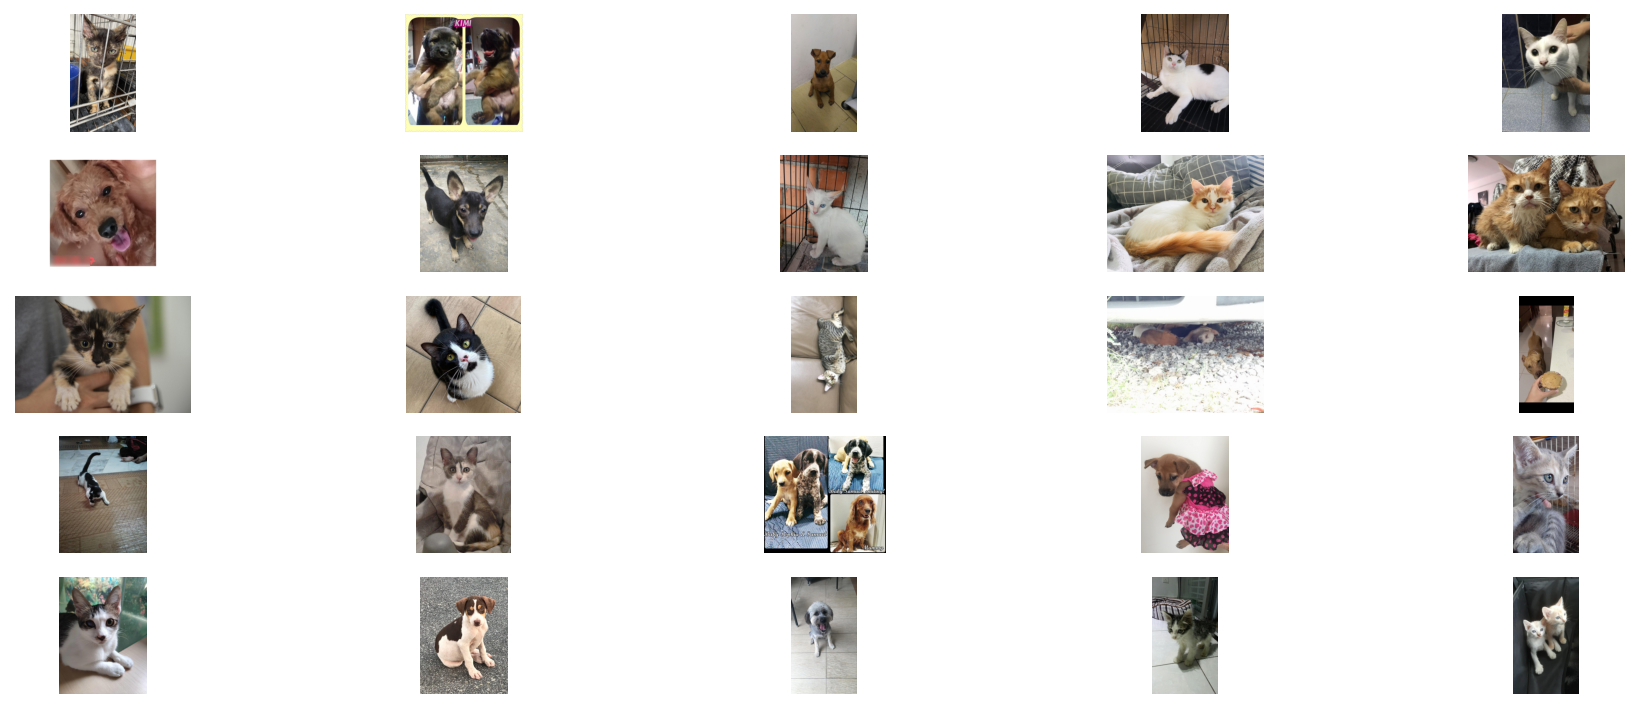

In [13]:
figure(figsize = (15, 6), dpi = 150)

temp = df['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

#TODO: figure out how to put ratings beneath each image
ratings = []
for index,file in enumerate(files):    
    plt.subplot(5,5,index+1)
    img = load_img(mypath + "/train/" + file + ".jpg")
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')
    ratings.append(np.array(df['label'][df['images'] == file])[0])

print(ratings)

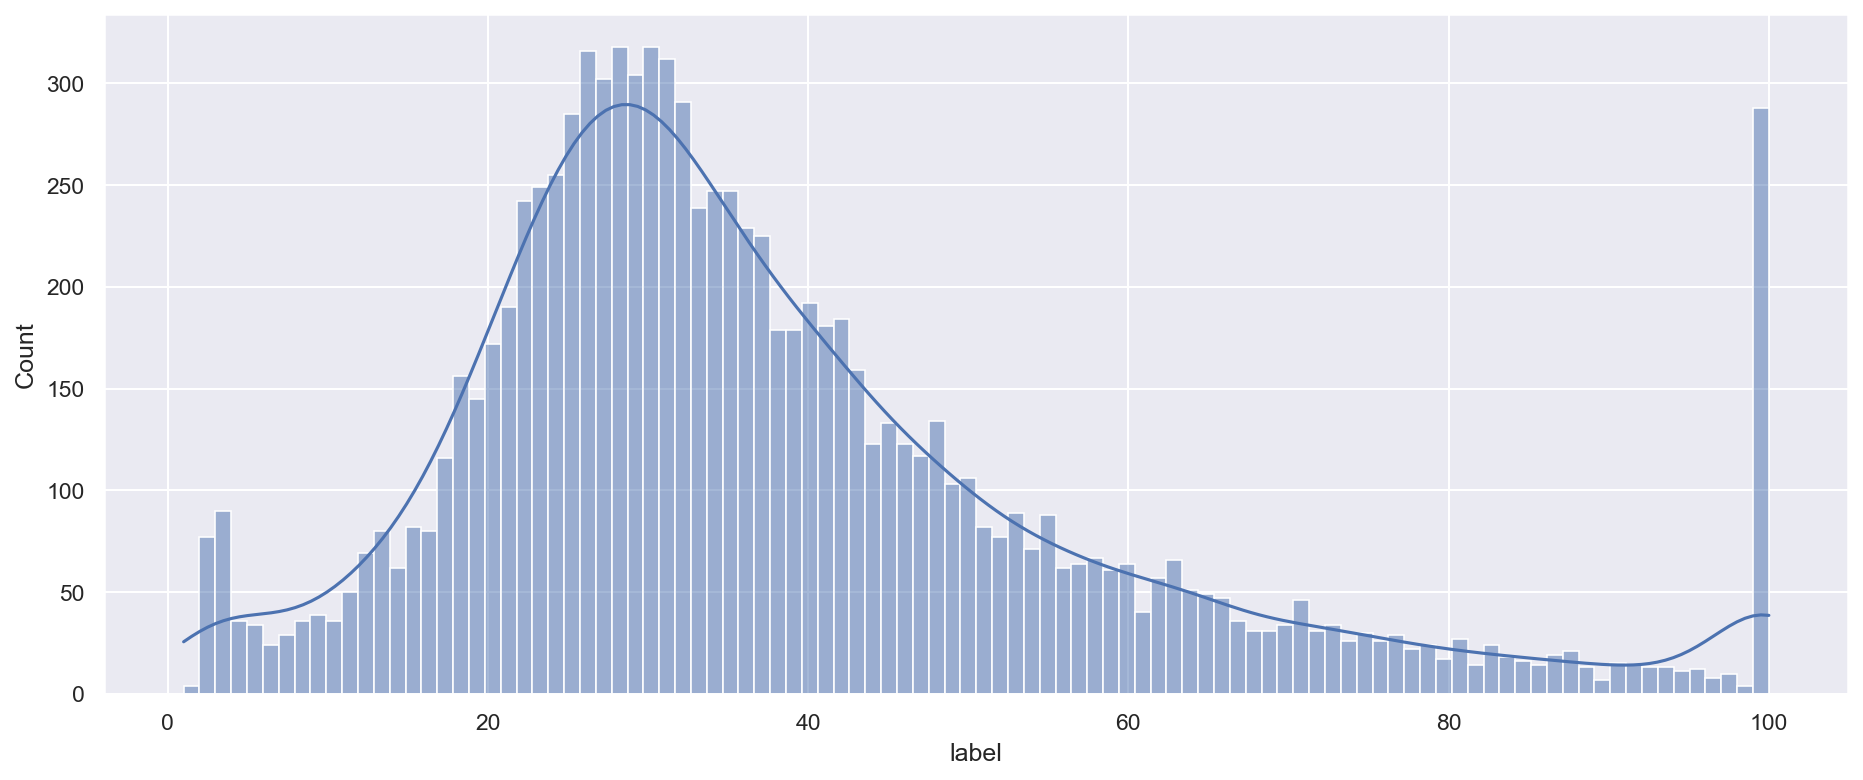

In [14]:
figure(figsize = (15, 6), dpi = 150)
sns.set(style="darkgrid")
ax = sns.histplot(df, x = 'label', bins = 100, kde = True)
plt.show()

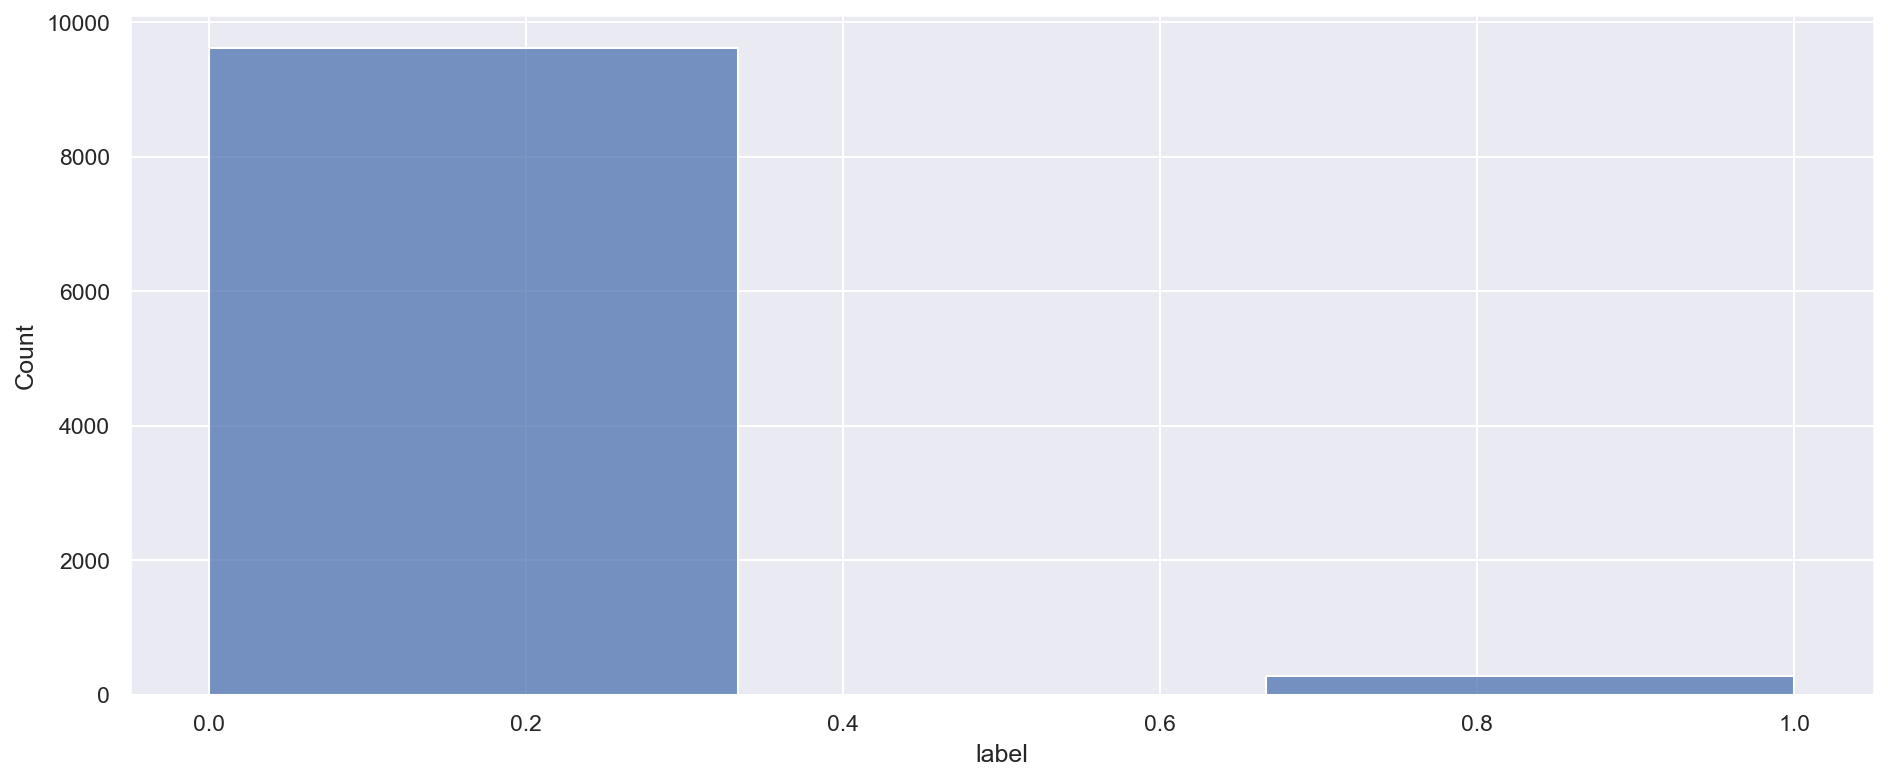

In [15]:
df.loc[df.label < 100, "label"] = 0
df.loc[df.label == 100, "label"] = 1
figure(figsize = (15, 6), dpi = 150)
sns.set(style="darkgrid")
ax = sns.histplot(df, x = 'label', bins = 3, kde = False)
plt.show()

In [17]:
print(df[df['label'] == 1])
print(df[df['label'] == 100])

                                images  label
19    00768659c1c90409f81dcdecbd270513      1
50    013f86ed0e765b189990d3d5ac28bd7d      1
86    0254f54b148543442373d5aad45b2d1a      1
182   04fef9f129bc6e4b90644d4290fde8c3      1
227   063d79b149f4d163eae86f777a39a42f      1
...                                ...    ...
9684  fa27d0eeeec835a00853d382f8777b19      1
9725  fb1b85c23f5cc8a079387ff575b67b50      1
9836  fde75ba22f491d31c9267e59f6cbfe1a      1
9843  fe200aff478f55ca4bcf77d9dade1217      1
9878  fedb56afb73e703dbcad66406943b45f      1

[288 rows x 2 columns]
Empty DataFrame
Columns: [images, label]
Index: []


In [18]:
df['images'] = mypath + "/train/" + df['images'] + ".jpg" 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=11)

In [23]:
#print(train[train['label'] == 1])
print(test[test['label'] == 1])

                                                 images  label
2267  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
9397  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
2401  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
4516  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
9147  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
7265  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
6172  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
6548  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
2083  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
8485  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
2004  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
746   C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
7789  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
5548  C:/Users/sager/OneDrive/Desktop/CS5824/Project...      1
9725  C:/Users/sager/OneDrive/Desktop/CS5824/Project...

In [24]:
#train = train[(train['label'] < 100) & (train['label'] > 5)]
print(train[train['label'] == 100])
print(test[test['label'] == 100])

Empty DataFrame
Columns: [images, label]
Index: []
Empty DataFrame
Columns: [images, label]
Index: []


In [27]:
df['label'] = df['label'].astype('str')
train['label'] = train['label'].astype('str')
test['label'] = test['label'].astype('str')

In [25]:
print(train['label'])

9900    0
117     0
7672    0
5522    0
1218    0
       ..
1293    0
4023    0
7259    0
5200    0
3775    0
Name: label, Length: 7929, dtype: int32


In [28]:
# Create data generator for the images
# splitting into testing and training data
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, # normalize the image 
    rotation_range = 40, # augmentation of images (helps to avoid overfitting)
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    #vertical_flip = True,
    fill_mode = 'nearest',
)

val_generator = ImageDataGenerator(rescale=1./255)

# TODO: can't seem to find documentation on what target_size does under hood
# from source code, the 'dataframe' argument is the dataframe of full image paths
train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=64, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=64, 
    class_mode='binary'
)

Found 7929 validated image filenames belonging to 2 classes.
Found 1983 validated image filenames belonging to 2 classes.


#print(np.array(train_iterator[123][0]).shape)
#train_iterator[0][1][0][0][0]
testflat = np.array(train_iterator[0][0])
print(testflat.shape)
#print(testflat_f.shape)

counter = 0
stack = None
super = None
for s in train_iterator:    
    testflat = s[0]
    if (counter == 3000):
        break
    for b in testflat:
        #counter = counter + 1
        if (stack is None):
            stack = b.flatten()
        else: stack = np.vstack((stack, b.flatten()))
        print(stack.shape)
    if (super is None):
            super = stack
    else: super = np.vstack((super, stack))
    counter = counter + 1


In [29]:
x_np_array = np.zeros(389726208)
x_np_array = np.reshape(x_np_array, (7929, 49152))
#print(x_np_array.shape)
#print(x_np_array)

y_np_array = np.zeros(7929)
y_np_array = np.reshape(y_np_array, (7929, 1))
print(y_np_array.shape)

(7929, 1)


In [30]:
xv_np_array = np.zeros(1983*128*128*3)
xv_np_array = np.reshape(xv_np_array, (1983, 49152))
#print(x_np_array.shape)
#print(x_np_array)

yv_np_array = np.zeros(1983)
yv_np_array = np.reshape(yv_np_array, (1983, 1))
print(yv_np_array.shape)

(1983, 1)


In [31]:
counter = 0

for s in train_iterator:    
    batch = s[0]
    batch_labels = s[1]
    
    #print(batch.shape)
    #print(batch_labels.shape)
    #print(x_np_array.shape)
    cardinality = batch.shape[0]       
    print("batch size: " + str(cardinality))

    for c in range(cardinality):
        print("c: " + str(c))
        x_np_array[counter] = batch[c].flatten()
        y_np_array[counter] = batch_labels[c]             
        print("counter: " + str(counter))
        counter = counter + 1    

#print(y_np_array)

batch size: 64
c: 0
counter: 0
c: 1
counter: 1
c: 2
counter: 2
c: 3
counter: 3
c: 4
counter: 4
c: 5
counter: 5
c: 6
counter: 6
c: 7
counter: 7
c: 8
counter: 8
c: 9
counter: 9
c: 10
counter: 10
c: 11
counter: 11
c: 12
counter: 12
c: 13
counter: 13
c: 14
counter: 14
c: 15
counter: 15
c: 16
counter: 16
c: 17
counter: 17
c: 18
counter: 18
c: 19
counter: 19
c: 20
counter: 20
c: 21
counter: 21
c: 22
counter: 22
c: 23
counter: 23
c: 24
counter: 24
c: 25
counter: 25
c: 26
counter: 26
c: 27
counter: 27
c: 28
counter: 28
c: 29
counter: 29
c: 30
counter: 30
c: 31
counter: 31
c: 32
counter: 32
c: 33
counter: 33
c: 34
counter: 34
c: 35
counter: 35
c: 36
counter: 36
c: 37
counter: 37
c: 38
counter: 38
c: 39
counter: 39
c: 40
counter: 40
c: 41
counter: 41
c: 42
counter: 42
c: 43
counter: 43
c: 44
counter: 44
c: 45
counter: 45
c: 46
counter: 46
c: 47
counter: 47
c: 48
counter: 48
c: 49
counter: 49
c: 50
counter: 50
c: 51
counter: 51
c: 52
counter: 52
c: 53
counter: 53
c: 54
counter: 54
c: 55
counter: 

IndexError: index 7929 is out of bounds for axis 0 with size 7929

In [32]:
counter = 0

for s in val_iterator:    
    batch = s[0]
    batch_labels = s[1]
   
    cardinality = batch.shape[0]       
    print("batch size: " + str(cardinality))

    for c in range(cardinality):
        print("c: " + str(c))
        xv_np_array[counter] = batch[c].flatten()
        yv_np_array[counter] = batch_labels[c]             
        print("counter: " + str(counter))
        counter = counter + 1    

#print(y_np_array)

batch size: 64
c: 0
counter: 0
c: 1
counter: 1
c: 2
counter: 2
c: 3
counter: 3
c: 4
counter: 4
c: 5
counter: 5
c: 6
counter: 6
c: 7
counter: 7
c: 8
counter: 8
c: 9
counter: 9
c: 10
counter: 10
c: 11
counter: 11
c: 12
counter: 12
c: 13
counter: 13
c: 14
counter: 14
c: 15
counter: 15
c: 16
counter: 16
c: 17
counter: 17
c: 18
counter: 18
c: 19
counter: 19
c: 20
counter: 20
c: 21
counter: 21
c: 22
counter: 22
c: 23
counter: 23
c: 24
counter: 24
c: 25
counter: 25
c: 26
counter: 26
c: 27
counter: 27
c: 28
counter: 28
c: 29
counter: 29
c: 30
counter: 30
c: 31
counter: 31
c: 32
counter: 32
c: 33
counter: 33
c: 34
counter: 34
c: 35
counter: 35
c: 36
counter: 36
c: 37
counter: 37
c: 38
counter: 38
c: 39
counter: 39
c: 40
counter: 40
c: 41
counter: 41
c: 42
counter: 42
c: 43
counter: 43
c: 44
counter: 44
c: 45
counter: 45
c: 46
counter: 46
c: 47
counter: 47
c: 48
counter: 48
c: 49
counter: 49
c: 50
counter: 50
c: 51
counter: 51
c: 52
counter: 52
c: 53
counter: 53
c: 54
counter: 54
c: 55
counter: 

IndexError: index 1983 is out of bounds for axis 0 with size 1983

In [ ]:
#print(np.sum(y_np_array))
#np.savetxt("pawp_train_flat.csv", arr_re, delimiter=",")

301730.0


In [33]:
from sklearn.svm import SVC
svr_rbf = SVC(kernel='rbf', C=1e4, gamma=0.1)
y_rbf = svr_rbf.fit(x_np_array, y_np_array).predict(x_np_array)


model2 = Sequential([
    Conv2D(64, (7,7), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((3,3)),
    Conv2D(16, (5,5), activation='relu'),
    MaxPool2D((3,3)),
    Conv2D(16, (4,4), activation='relu'),
    Conv2D(16, (2,2), activation='relu'),
    #Conv2D(256, (2,2), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dropout(rate = 0.25),    
    Dense(2048, activation='sigmoid'),    
    Dense(1, activation='linear'),
])

In [38]:
val_predicted = svr_rbf.predict(xv_np_array)

In [48]:
print(val_predicted)
print(np.sum(val_predicted))

[0. 0. 0. ... 0. 0. 0.]
0.0
